# 형태소 분석하기

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 945 kB/s eta 0:00:01    |███████▉                        | 4.8 MB 1.1 MB/s eta 0:00:13     |█████████████▉                  | 8.4 MB 2.4 MB/s eta 0:00:05
     |████████████████████████████████| 381 kB 950 kB/s eta 0:00:01


In [6]:
import konlpy

In [4]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]'

In [8]:
from konlpy.tag import Okt # 형태소 분석기
okt = Okt()

print(okt.morphs("이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리")) # 형태소 추출

['이', '여름', '다시', '한', '번', '설레고', '싶다', ',', '그', '여름', '을', '틀어줘', '.', '싹', '쓰리']


In [9]:
print(okt.pos("이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리")) # 품사 태깅

[('이', 'Noun'), ('여름', 'Noun'), ('다시', 'Noun'), ('한', 'Verb'), ('번', 'Noun'), ('설레고', 'Adjective'), ('싶다', 'Verb'), (',', 'Punctuation'), ('그', 'Noun'), ('여름', 'Noun'), ('을', 'Josa'), ('틀어줘', 'Verb'), ('.', 'Punctuation'), ('싹', 'Noun'), ('쓰리', 'Adjective')]


In [10]:
print(okt.nouns("이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리")) # 명사 추출

['이', '여름', '다시', '번', '그', '여름', '싹']


In [11]:
from konlpy.tag import Hannanum # 한나눔 모듈 불러오기
han = Hannanum()

print(han.morphs("이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리")) # 형태소 분석

['이', '여름', '다시', '하', 'ㄴ', '번', '설레', '고', '싶', '다', ',', '그', '여름', '을', '틀', '어', '주', '어', '.', '싹쓰', '이', '리']


In [12]:
print(han.pos("이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리")) # 품사 태깅

[('이', 'M'), ('여름', 'N'), ('다시', 'M'), ('하', 'P'), ('ㄴ', 'E'), ('번', 'N'), ('설레', 'P'), ('고', 'E'), ('싶', 'P'), ('다', 'E'), (',', 'S'), ('그', 'M'), ('여름', 'N'), ('을', 'J'), ('틀', 'P'), ('어', 'E'), ('주', 'P'), ('어', 'E'), ('.', 'S'), ('싹쓰', 'N'), ('이', 'J'), ('리', 'E')]


In [14]:
print(han.nouns("이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리")) # 명사 추출

['여름', '번', '여름', '싹쓰']


In [16]:
import konlpy
from konlpy.tag import Hannanum

nan = Hannanum()
text = input("분석할 텍스트를 입력하시오: ")
result = han.pos(text)

for lex, pos in result:
    print("{}\t{}".format(lex, pos))

분석할 텍스트를 입력하시오: 이 여름 다시 한 번 설레고 싶다, 그 여름을 틀어줘. 싹쓰리
이	M
여름	N
다시	M
하	P
ㄴ	E
번	N
설레	P
고	E
싶	P
다	E
,	S
그	M
여름	N
을	J
틀	P
어	E
주	P
어	E
.	S
싹쓰	N
이	J
리	E


### - Corpus 이용

In [17]:
from konlpy.corpus import kolaw
from konlpy.tag import Okt

okt = Okt()

In [18]:
law_corpus = kolaw.open("constitution.txt").read()
law_corpus[:50]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임'

In [20]:
okt.pos(law_corpus[:50]) # 품사 태깅

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임', 'Noun')]

### 정제(cleaning) 
- corpus에서 노이즈 데이터 제거

#### re 모듈을 이용해 복습하기
text1 = "서울 부동산 가격이 올해 들어 평균 30% 상승했습니다."에서 숫자만 제외  
text2 = "\*서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!"에서 문장부호, 특수문자 제외  
text3 = "*서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!"에서 *만 제외

In [21]:
import re

In [27]:
text1 = "서울 부동산 가격이 올해 들어 평균 30% 상승했습니다."

p = re.compile("[0-9]+")
p.sub("",text1)

'서울 부동산 가격이 올해 들어 평균 % 상승했습니다.'

In [31]:
text2 = "*서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!"

p = re.compile("\W+")
p.sub(" ", text2)

' 서울 부동산 가격이 올해 들어 평균 30 상승했습니다 '

In [33]:
text3 = "서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!"

p = re.compile("\*")
p.sub("", text3)

'서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!'

### 불용어 제거

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yooseungli/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
import nltk
from nltk.corpus import stopwords

stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

In [48]:
word_tokens = word_tokenize(example)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens)
print(result)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


### [실습] 불용어 제거_한글

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = """이 여름 다시 한번 설레고 싶다 그때 그 여름을 틀어줘 그 여름을 들려줘
이 여름도 언젠가는 그해 여름 오늘이 가장 젊은 내 여름"""
stop_words = "이 그 또 가장"
# 위의 불용어는 명사가 아닌 단어 중에서 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님

In [50]:
stop_words = stop_words.split(" ")
word_tokens = word_tokenize(example)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
    
print(word_tokens)
print(result)

['이', '여름', '다시', '한번', '설레고', '싶다', '그때', '그', '여름을', '틀어줘', '그', '여름을', '들려줘', '이', '여름도', '언젠가는', '그해', '여름', '오늘이', '가장', '젊은', '내', '여름']
['여름', '다시', '한번', '설레고', '싶다', '그때', '여름을', '틀어줘', '여름을', '들려줘', '여름도', '언젠가는', '그해', '여름', '오늘이', '젊은', '내', '여름']


In [51]:
import nltk
import konlpy
from konlpy.corpus import kobill # kobill : konlpy에 내장되어 있는 법률안 읽어오는 함수

files_ko = kobill.fileids() # kobill에는 team POPONG(pokr.kr)에 의해 취합된 의회 정보들이 존재
files_ko #kobill에 담긴 문서 확인

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [52]:
doc_ko = kobill.open("1809894.txt").read()
doc_ko

'고등교육법 일부개정법률안\n\n(안상수의원 대표발의 )\n\n 의 안\n 번 호\n\n9894\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 안상수․김정훈․원희목 \n\n강석호․서상기․나성린 \n\n권영진․이춘식․정영희 \n\n이애주․안형환․백성운 \n\n김금래 의원(13인)\n\n제안이유 및 주요내용\n\n  현재 간호사의 경우 전문대학 졸업 또는 대학 졸업에 상관없이 면\n\n허증을 취득할 수 있지만, 학위의 종류가 전문학사이기 때문에 학사학\n\n위를 취득하기 위하여 87.2%가 별도로 학사학위 교육과정을 이수하고 \n\n있는 실정임.\n\n  이러한 4년제 간호 교육의 필요성과 선진 각국의 경향을 고려하고 \n\n국민에 대한 보다 나은 의료 서비스를 제공하기 위하여 대통령령이 \n\n정하는 일정한 기준을 충족하는 간호과에 대해서는 수업연한을 4년으\n\n로 하고, 수여하는 학위의 종류를 학사학위로 하도록 함(안 제50조의3 \n\n신설).\n\n- 1 -\n\n\x0c법률  제        호\n\n고등교육법 일부개정법률안\n\n고등교육법 일부를 다음과 같이 개정한다.\n\n제50조의3을 다음과 같이 신설한다.\n\n제50조의3(간호과의 수업연한 및 학위에 관한 특례) ① 대통령령이 정\n\n하는 기준을 충족하는 간호과의 수업연한은 4년으로 한다.\n\n  ② 제1항의 간호과에서 학칙이 정하는 과정을 이수한 자에 대하여\n\n는 학사학위를 수여한다.\n\n  ③ 제2항의 학위의 종류 및 수여에 관하여 필요한 사항은 대통령령\n\n으로 정한다.\n\n부      칙\n\n① 이 법은 공포 후 6개월이 경과한 날부터 시행한다.\n\n② 이 법 시행 당시 수업연한이 4년으로 된 간호과에 재학 중인 자에 \n\n대해서는 본인의 신청에 의하여 종전의 수업연한 및 학위에 관한 규\n\n정을 적용할 수 있다.\n\n- 3 -\n\n\x0c신·구조문대비표\n\n현      행\n\n개   정   안\n\n  <신  설>\n\n제50조의3(간

In [53]:
from konlpy.tag import Okt
okt = Okt()

nouns = okt.nouns(doc_ko) # 명사 분석
nouns

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '안상수',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '수',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '과',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '안',
 '제',
 '신설',
 '법률',
 '제',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '제',
 '다음',
 '신설',
 '제',
 '간호',
 '수업',
 '연한',
 '및',
 '학위',
 '관',
 '특례',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '제',
 '항의',
 '간호',
 '과',
 '학칙',
 '정',
 '과정',
 '이수',
 '자',
 '대하',
 '학사',
 '학위',


In [54]:
ko = nltk.Text(nouns, name = "의안 제1809894호")

print(len(ko.tokens)) # 수집된 단어의 횟수
print(len(set(ko.tokens))) # 수집된 단어의 고유한 횟수

ko.vocab() # 단어별 빈도

240
121


FreqDist({'학위': 11, '간호': 9, '정': 9, '제': 9, '수업': 7, '연한': 7, '및': 6, '안': 5, '관': 5, '자': 4, ...})

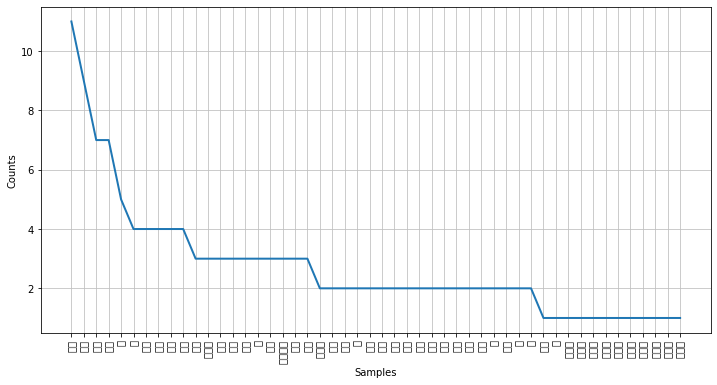

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


# 한글 안깨지게
import platform
path = "/Users/yooseungli/Library/Fonts/한국외대체B.otf"
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)


plt.figure(figsize = (12, 6))
ko.plot(50) # 많이 등장한 50개 순으로 그래프
plt.show()

In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud

stopwords = ["정", "제", "및", "안", "지", "과", "수", "의", "이", "발"]
ko = [each_word for each_word in ko if each_word not in stopwords]
ko

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안상수',
 '의원',
 '대표',
 '발의',
 '번',
 '호',
 '발의',
 '연월일',
 '자',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '기준',
 '충족',
 '간호',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '신설',
 '법률',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '다음',
 '신설',
 '간호',
 '수업',
 '연한',
 '학위',
 '관',
 '특례',
 '대통령령',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '항의',
 '간호',
 '학칙',
 '과정',
 '이수',
 '자',
 '대하',
 '학사',
 '학위',
 '수여',
 '항의',
 '학위',
 '종류',
 '수여',
 '관',
 '사항',
 '대통령령',
 '부',
 '칙',
 '법',
 '공포',
 '후',
 '개월',
 '경과',
 '날',
 '시행',
 '법',

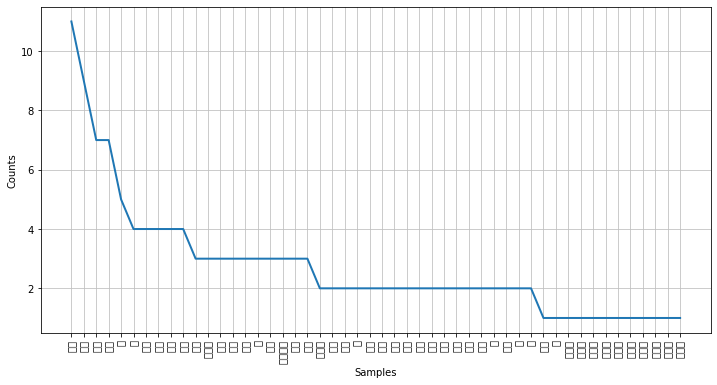

In [61]:
ko = nltk.Text(ko, name = "의안 제1809894호")

plt.figure(figsize = (12, 6))
ko.plot(50)
plt.show()

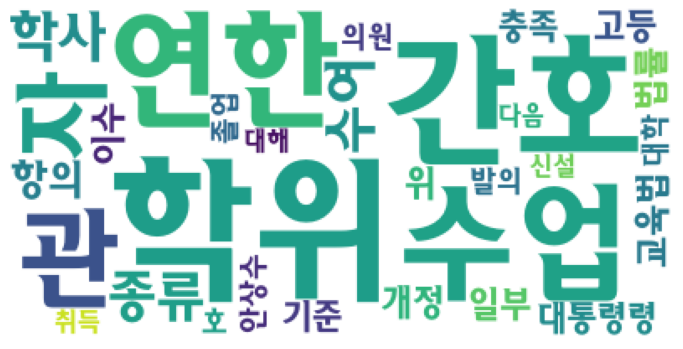

In [66]:
data = ko.vocab().most_common(30)

wordcloud = WordCloud(font_path = "/Users/yooseungli/Library/Fonts/한국외대체B.otf", background_color = "white").generate_from_frequencies(dict(data))

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()